# Intro to matplotlib

> The purpose of computing is insight, not numbers.
>
> — <cite>Richard Hamming</cite>

We want to do more with arrays than calculate single values or look closely at their elements. A core part of doing science is gaining insight into the patterns revealed by data, for which **visualization** is key. We can produce publication-quality plots from `numpy` arrays with [`matplotlib`](https://matplotlib.org/).

Having our data in numpy arrays, we want to plot them!

## Test data

`numpy` arrays can be of any dimensionality, not just 1-D. It's common to encounter 2-D arrays, and for illustration we'll look at the position of a particle in three dimensions with time:

In [1]:
import numpy as np

The `create_position()` function is just a helper function that we will use throughout the notebook in order to quickly generate interesting data. 

You can get it from the `helpers.py` module with 
```python
from helpers import create_position
```
or just execute the cell below. (In general, it is good practice to put reusable code into a module and keep your notebook simple.)

In [2]:
def create_position(nframes=10**6):
    """Get array of x, y, and z position of a particle with time.
    
    Parameters
    ----------
    nframes: int
        number of frames; more frames increases the resolution
        of the trajectory, but not its length
        
    Returns
    -------
    position : `nframes` x 3 array
        (x, y, z) position of the particle with time
        
    """
    # generate x, y, z positions
    x = np.cos(np.linspace(0, 20, nframes))
    y = 3 * np.sin(np.linspace(0, 10, nframes))
    z = -2 * np.sin(np.pi * np.linspace(0, 5, nframes))

    # put them all in a single array; this gives
    # an array with 3 rows and nframes columns
    position = np.array([x, y, z])

    # transposing puts the array into the [[x, y, z], [x, y, z], ...] shape
    return position.transpose()

# Plotting with matplotlib

In [3]:
# we want to use the pyplot interface
import matplotlib.pyplot as plt

Use a pretty style (optional... try out [different styles](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html))

In [4]:
plt.matplotlib.style.use('ggplot')

Make figures a bit smaller by default (w x h in inches) (optional)

In [5]:
plt.rcParams["figure.figsize"] = (5, 4)

In [6]:
# this tells the notebook to render plots inline (typically not needed)
%matplotlib inline

Get some data to play with

In [7]:
position = create_position()

*matplotlib* contains [two different plotting interfaces](https://matplotlib.org/stable/tutorials/introductory/usage.html#the-object-oriented-interface-and-the-pyplot-interface)
- simple "state-based" plotting on a canvas (`pyplot`)
- object-oriented API

### Basic plots: Plotting on a canvas (`pyplot`)

Let's plot the x position of our particle as a function of frame:

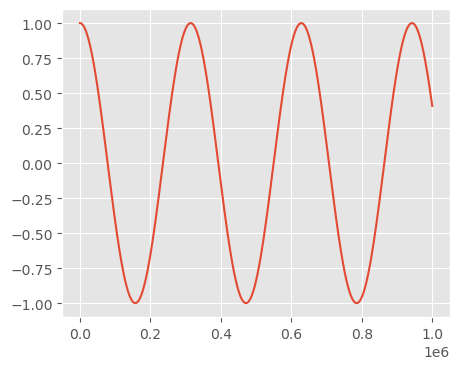

In [8]:
plt.plot(position[:, 0])

And then perhaps the x and y position on the x- and y-axis, respectively... and we need labels, too:

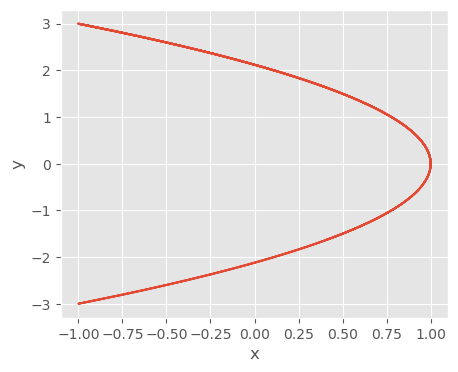

In [9]:
plt.plot(position[:, 0], position[:, 1])
plt.xlabel("x")
plt.ylabel("y");

### Saving figures

matplotlib can export graphs to many different file formats such as *png*, *jpg*, *eps*, *svg*, and *pdf* typically works, too.

In the simplest case, you use `plt.savefig(FILENAME)` after plotting — it will save everything on your "canvas":

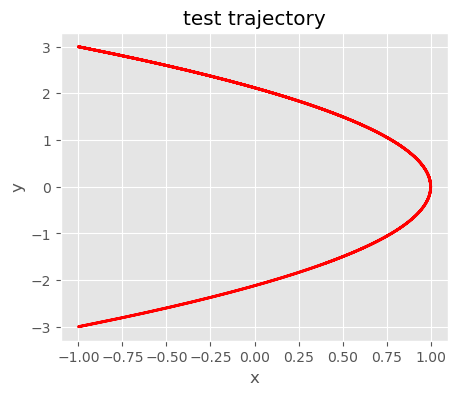

In [10]:
plt.plot(position[:, 0], position[:, 1], linewidth=2, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("test trajectory")
plt.savefig("test_trajectory_y.png")

In [11]:
%ls *.png

diffusion_sim_theory_fit.png  test_trajectory_y.png
diffusion_trajectories.png


### Multiple graphs

Plot all three timeseries together

In [12]:
X, Y, Z = position.transpose()

In [13]:
X.shape

(1000000,)

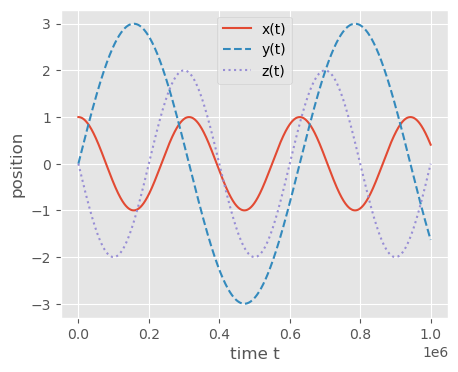

In [14]:
plt.plot(X, linestyle="-", label="x(t)")
plt.plot(Y, linestyle="--", label="y(t)")
plt.plot(Z, linestyle=":", label="z(t)")
plt.xlabel("time t")
plt.ylabel("position")
plt.legend(loc="best");

Note
- `linestyle` for different [matplotlib line styles](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html)
- [`legend()`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html?highlight=legend#matplotlib.pyplot.legend) to add a legend with the `labels`

### Panel plots: Using the object-oriented API

`matplotlib` is said to make easy things easy and hard things possible when it comes to plotting. Let's make a three-panel plot giving the x, y, and z position as a function of frame.

We use the object-oriented API that provides fine-grained control over [all parts of a figure](https://matplotlib.org/stable/tutorials/introductory/usage.html#parts-of-a-figure):
1. create a `Figure` instance.
2. add `Axes` instances to the `Figure`.
3. plot into the `Axes` instances
4. annotate each plot (i.e., each `Axes`)

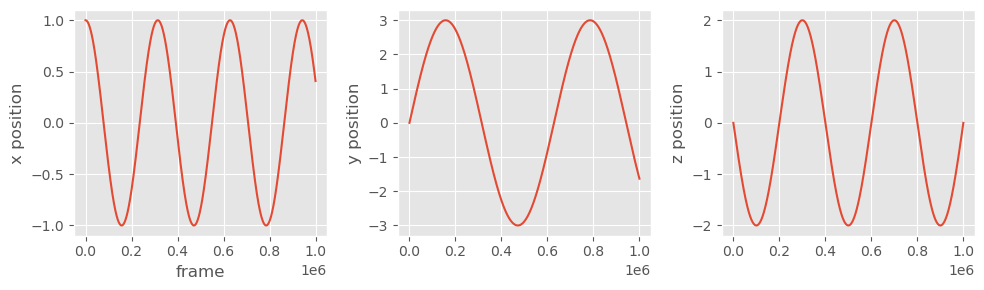

In [15]:
fig = plt.figure(figsize=(10,3))

# make an axes object for the figure, each with a different position
# on a grid that has 1 row and 3 columns of axes
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# plot the x position
ax1.set_ylabel('x position')
ax1.set_xlabel('frame')
ax1.plot(position[:, 0])

# plot the y position
ax2.set_ylabel('y position')
ax1.set_xlabel('frame')
ax2.plot(position[:, 1])

# plot the z position
ax3.set_ylabel('z position')
ax1.set_xlabel('frame')
ax3.plot(position[:, 2])

fig.tight_layout()

There's plenty more we could do with this to make it prettier. For a primer on making visually appealing and informative plots, check out [this notebook](https://github.com/Becksteinlab/making-prettier-plots/blob/master/Making%20better%20plots.ipynb).

### 3D plotting
Matplotlib has [basic 3D capabilities](http://matplotlib.org/1.3.1/mpl_toolkits/mplot3d/tutorial.html); for more sophisticated plots check out [mayavi](http://docs.enthought.com/mayavi/mayavi/).

In [16]:
%matplotlib inline

(You can also try `%matplotlib widget` (or `%matplotlib ipympl`) and if you are lucky, you will be able to get an interactive 3D graphic. However, that does not always seem to work or you have to make sure that it is the first and only `%matplotlib` command that you use.)

In [17]:
%matplotlib widget

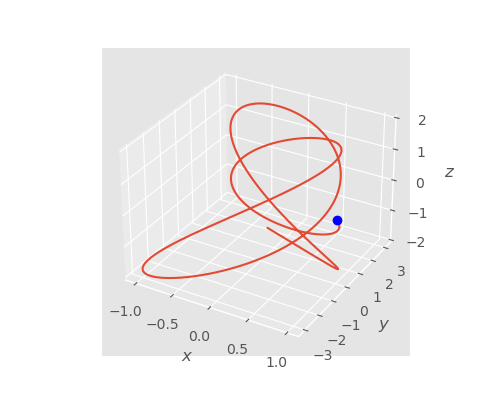

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

position = create_position()
x, y, z = position.transpose()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.plot(x[0:1], y[0:1], z[0:1], 'bo')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$");